In [253]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix 

In [254]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
iris = pd.read_csv(url, names=column_names)

# Display the first 5 rows of the dataset
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [255]:
# Get summary statistics of the dataset
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


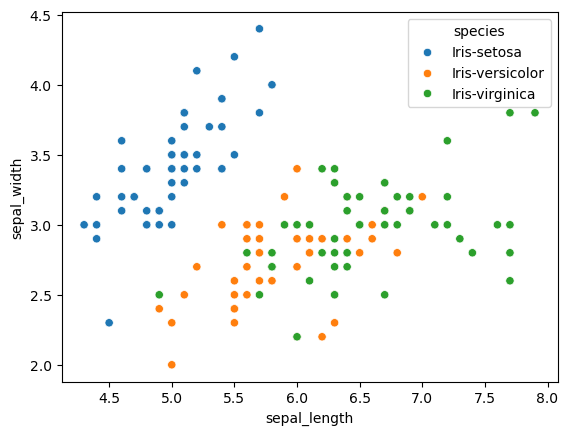

In [256]:
# Visualize sepal length vs. sepal width
sns.scatterplot(x='sepal_length', y='sepal_width', hue='species', data=iris)
plt.show()

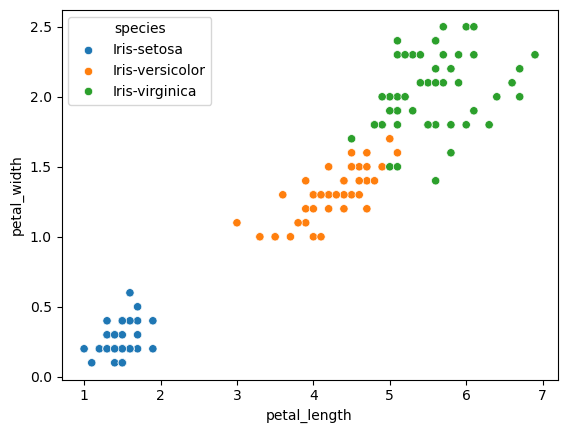

In [257]:
# Visualize petal length vs. petal width
sns.scatterplot(x='petal_length', y='petal_width', hue='species', data=iris)
plt.show()

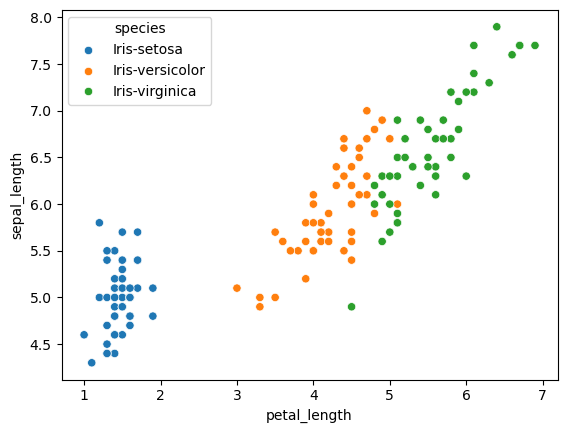

In [258]:
# Visualize petal length vs. petal width
sns.scatterplot(x='petal_length', y='sepal_length', hue='species', data=iris)
plt.show()

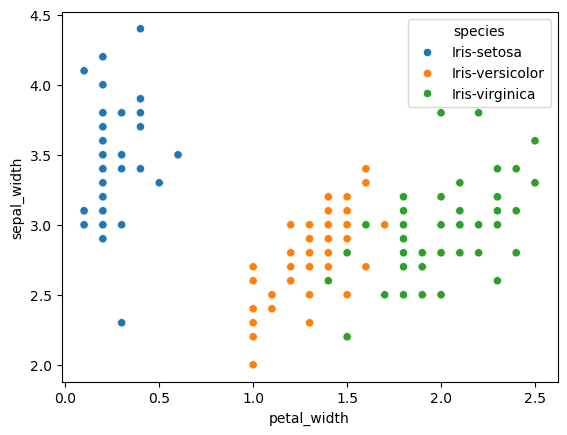

In [259]:
# Visualize petal length vs. petal width
sns.scatterplot(x='petal_width', y='sepal_width', hue='species', data=iris)
plt.show()

In [260]:
# Calculate the averages for each species
averages = iris.groupby('species').mean().reset_index()
print(averages)

           species  sepal_length  sepal_width  petal_length  petal_width
0      Iris-setosa         5.006        3.418         1.464        0.244
1  Iris-versicolor         5.936        2.770         4.260        1.326
2   Iris-virginica         6.588        2.974         5.552        2.026


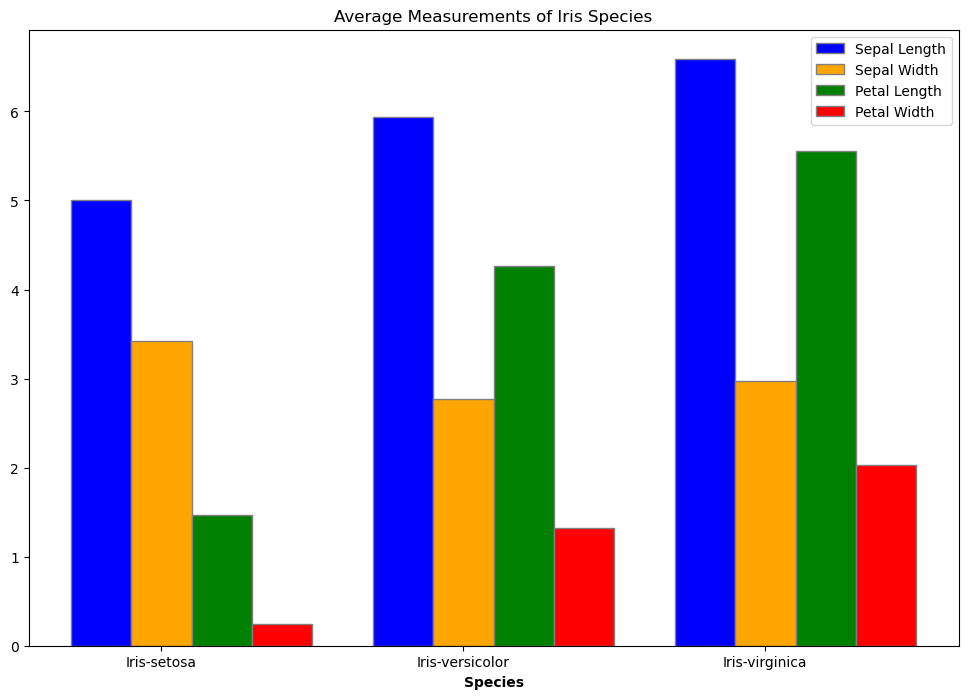

In [261]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size for better visibility
plt.figure(figsize=(12, 8))

# Set the bar width
bar_width = 0.2

# Set the positions of the bars
r1 = range(len(averages))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

# Create the bar plots
plt.bar(r1, averages['sepal_length'], color='blue', width=bar_width, edgecolor='grey', label='Sepal Length')
plt.bar(r2, averages['sepal_width'], color='orange', width=bar_width, edgecolor='grey', label='Sepal Width')
plt.bar(r3, averages['petal_length'], color='green', width=bar_width, edgecolor='grey', label='Petal Length')
plt.bar(r4, averages['petal_width'], color='red', width=bar_width, edgecolor='grey', label='Petal Width')

# Add labels
plt.xlabel('Species', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(averages))], averages['species'])

# Add legend
plt.legend()

# Display the bar plot
plt.title('Average Measurements of Iris Species')
plt.show()

In [262]:
# Separate features and labels
X = iris.drop('species', axis=1)
y = iris['species']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [263]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [264]:
# Make predictions on the test data
y_pred = knn.predict(X_test)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


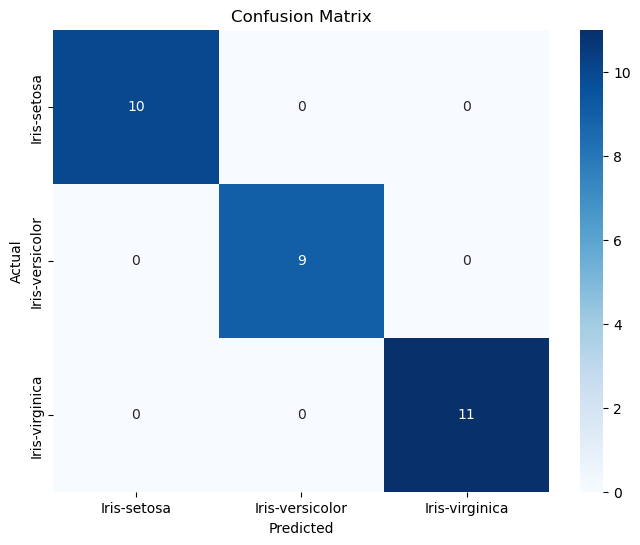

In [265]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=iris['species'].unique(), yticklabels=iris['species'].unique())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [266]:
# Print the classification report
class_report = classification_report(y_test, y_pred)
print(class_report)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [267]:
# New data points with column names
X_new = pd.DataFrame([[3, 2, 1, 0.2], [4.9, 2.2, 3.8, 1.1], [5.3, 2.5, 4.6, 1.9]], columns=X.columns)

# Scale the new data points using the same scaler used for training data
X_new_scaled = scaler.transform(X_new)

#Prediction of the species from the input vector
prediction = knn.predict(X_new_scaled)
print("Prediction of Species: {}".format(prediction))

Prediction of Species: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
